### CHIMPANZEE/GORILLA/ORANGUTAN CLASSIFICATION

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2 as cv
import os

In [2]:
gpu=tf.config.experimental.list_physical_devices('GPU')
for i in gpu:
    tf.config.experimental.set_memory_growth(i,True)

In [3]:
import imghdr
img_exts=['jpg','png','jpeg','bmp']
for classes in os.listdir('data'):
    for image_path in os.listdir(os.path.join(f'data',classes)):
        image= os.path.join('data',classes,image_path)
        try:
            img=cv.imread(image)
            tip=imghdr.what(image)
            if tip not in img_exts:
                print(f'image {image} has invalid extension')
                os.remove(image)
        except Exception as e:
            print(f'issue with image {image}')




(1536, 2048, 3)


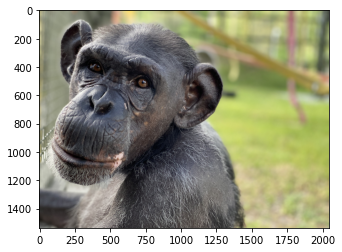

In [4]:

temp=cv.imread(os.path.join('data','chimpanzee','IMG_0037.jpg'))
print(temp.shape)
plt.imshow(cv.cvtColor(temp,cv.COLOR_RGB2BGR));

In [5]:
data=tf.keras.utils.image_dataset_from_directory('data',batch_size=30)
iterator=data.as_numpy_iterator()
batch=iterator.next()


Found 291 files belonging to 3 classes.


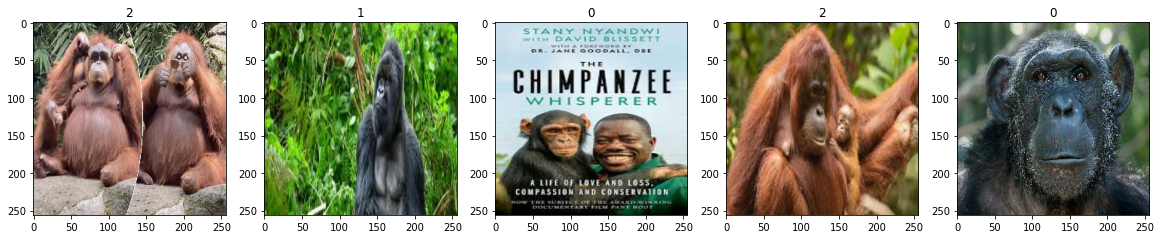

In [6]:
fig,ax=plt.subplots(ncols=5,figsize=(20,20))
for idx,img in enumerate(batch[0][:5]):
    
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [7]:

# 0: chimpanzee
# 1: gorilla
# 2: orangutan



In [8]:
# scaling the data
data=data.map(lambda x,y:(x/255,y))
batch=data.as_numpy_iterator().next()




In [9]:
train_size=int(len(data)*.7) # training data is 66% of the whole dataset
val_size=int(len(data)*.2) # validation data is approx 22% of the whole dataset
test_size=int(len(data)*.1) # testing data is approx 12% of the whole dataset


train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,AveragePooling2D,Dense,Flatten


model=Sequential()

model.add(Conv2D(10,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(AveragePooling2D())

model.add(Conv2D(20,(3,3),1,activation='relu'))
model.add(AveragePooling2D())





model.add(Flatten())
model.add(Dense(120,activation='relu'))
model.add(Dense(84,activation='relu'))
model.add(Dense(3,activation='softmax'))


    


In [11]:


model.compile('adam',loss=tf.losses.sparse_categorical_crossentropy,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 10)      280       
                                                                 
 average_pooling2d (AverageP  (None, 127, 127, 10)     0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 20)      1820      
                                                                 
 average_pooling2d_1 (Averag  (None, 62, 62, 20)       0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 76880)             0         
                                                                 
 dense (Dense)               (None, 120)               9

In [12]:
callback=tf.keras.callbacks.TensorBoard(log_dir='logs')

In [13]:
record=model.fit(train,epochs=20,validation_data=val,callbacks=[callback])

Epoch 1/20
7/7 [==============================] - 6s 620ms/step - loss: 1.8677 - accuracy: 0.3714 - val_loss: 1.4284 - val_accuracy: 0.3000
Epoch 2/20
7/7 [==============================] - 5s 555ms/step - loss: 1.2566 - accuracy: 0.3667 - val_loss: 1.0211 - val_accuracy: 0.4667
Epoch 3/20
7/7 [==============================] - 5s 627ms/step - loss: 0.9850 - accuracy: 0.5429 - val_loss: 0.8400 - val_accuracy: 0.7500
Epoch 4/20
7/7 [==============================] - 5s 584ms/step - loss: 0.7882 - accuracy: 0.7048 - val_loss: 0.5866 - val_accuracy: 0.8500
Epoch 5/20
7/7 [==============================] - 5s 574ms/step - loss: 0.5764 - accuracy: 0.7762 - val_loss: 0.4128 - val_accuracy: 0.8833
Epoch 6/20
7/7 [==============================] - 5s 623ms/step - loss: 0.3309 - accuracy: 0.8952 - val_loss: 0.2136 - val_accuracy: 1.0000
Epoch 7/20
7/7 [==============================] - 5s 613ms/step - loss: 0.2353 - accuracy: 0.9190 - val_loss: 0.0992 - val_accuracy: 1.0000
Epoch 8/20
7/7 [====

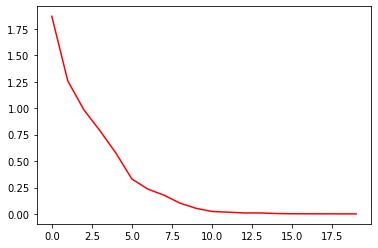

In [14]:
# training accuracy after 20 epochs: 100%
# validation accuracy after 20 epochs: 100%

plt.plot(record.history['loss'],color='red');


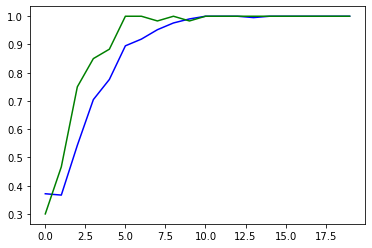

In [15]:
plt.plot(record.history['accuracy'],color='blue');
plt.plot(record.history['val_accuracy'],color='green');

In [16]:
test_batch=test.as_numpy_iterator().next()
pred_cols=[]



def prediction(dataset):
    
    preds=model.predict(dataset)
    for i in preds:
    
        pred_cols.append(i.argmax())

    for j in range(len(pred_cols)):
        if pred_cols[j]==0:
            pred_cols[j]='Chimpanzee'
        elif pred_cols[j]==1:
            pred_cols[j]='Gorilla'
        else:
            pred_cols[j]='Orangutan'

prediction(test_batch[0])
        

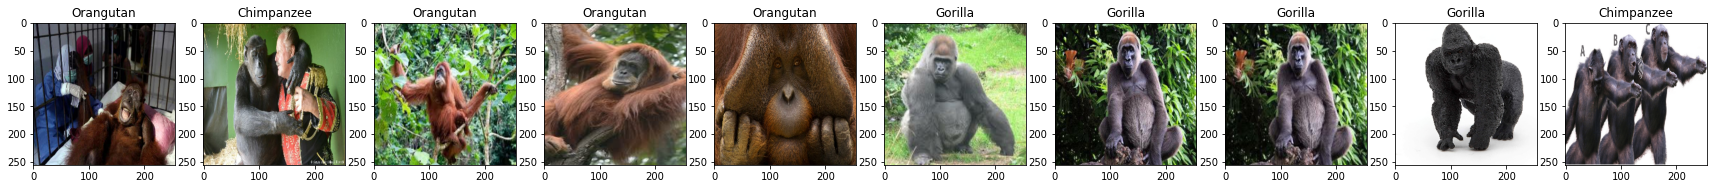

In [17]:
fig,ax=plt.subplots(ncols=10,figsize=(30,30))
for idx,img in enumerate(test_batch[0][:10]):
    
    ax[idx].imshow(img)
    ax[idx].title.set_text(pred_cols[idx])

In [18]:
model_json = model.to_json()
with open("primateclass.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("primateclass.h5")

In [ ]:
model_json = open(path_to_model_json, 'r')
loaded_model_json = model_json.read()
model_json.close()
model = model_from_json(loaded_model_json)
model.load_weights(path_to_model_weight)

In [26]:
def image_pred(img,model):
    image=cv.imread(img)
    image=tf.image.resize(image,(256,256))
    image_resized=np.expand_dims(image,0)
    result=np.argmax(model.predict(image_resized/255))

    if result==0:
        return('Chimpanzee')
    elif result==1:
        return('Gorilla')
    elif result==2:
        return('Orangutan')
    
    
image_pred('testim2.jpg',model)   

'Chimpanzee'

In [27]:
model2=tf.keras.models.load_model('/model/save1.hdf5')


'Gorilla'